# Data Analytics HW2 Linear Regression and Logistisc Regression 

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### This HW is to practice building Linear and Loistic Regression model. Note that some questions will carry more weights than the others. 

### Part A

#### First let's build a Linear Regression model for a housing dataset

In [198]:
df = pd.read_csv("USA_housing.csv")
df.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [199]:
df.shape

(5000, 7)

In [200]:
df.isnull().any()

Income                  False
HouseAge                False
NumberOfRooms           False
AreaNumberOfBedrooms    False
Population              False
Price                   False
Address                 False
dtype: bool

### we can use simple scatter to check how the house price depends on different variables


<AxesSubplot:xlabel='NumberOfRooms', ylabel='Price'>

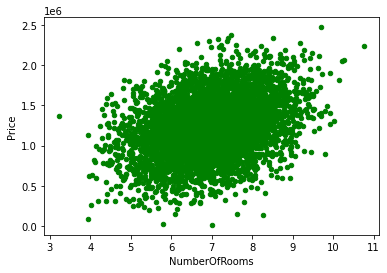

In [201]:
# For example
df.plot(kind='scatter', x = "NumberOfRooms", y = "Price", color = "green")

### Question 1: Do a pairplot and calculate all the pairwise correlation. Among all the numerical variables, rank them according to which one would impact the house price the most

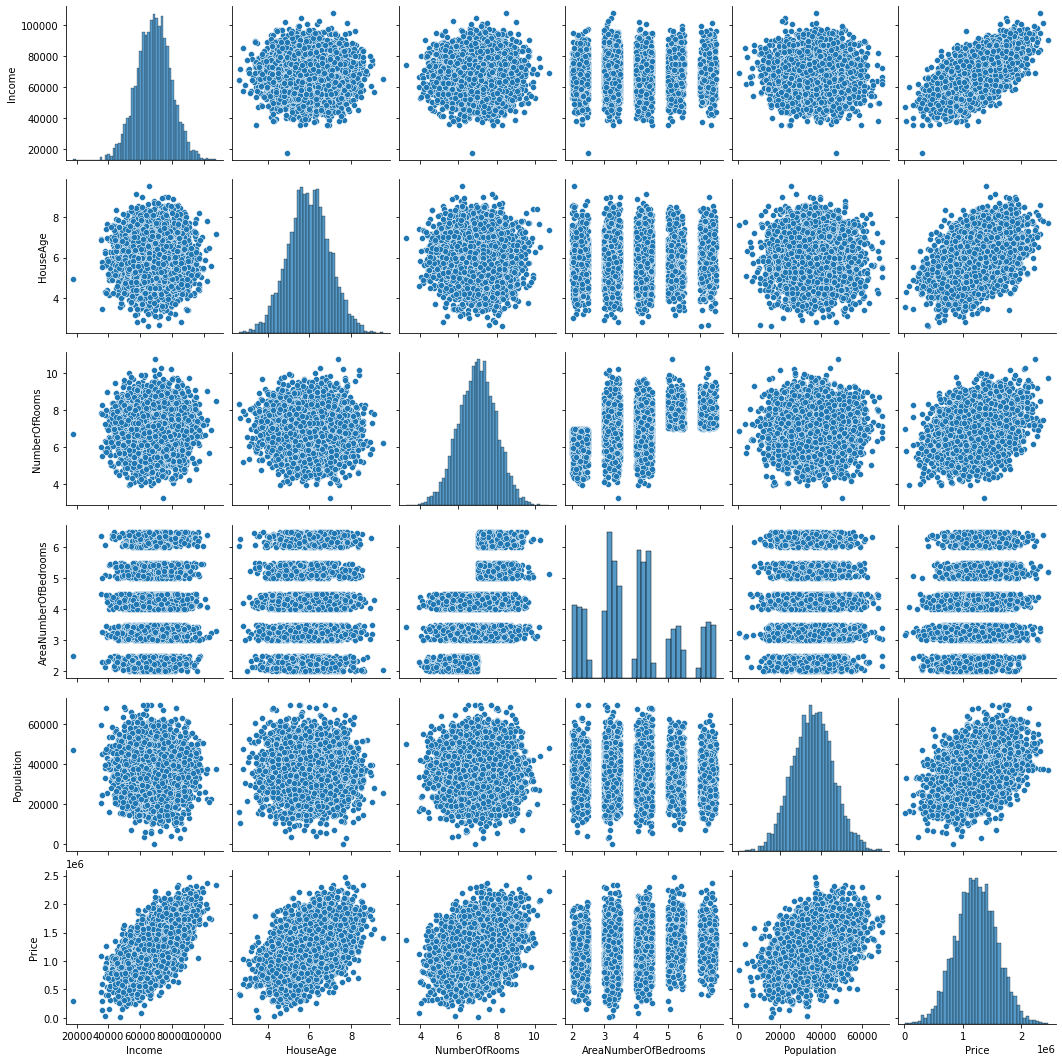

In [202]:
sns.pairplot(df, kind = 'scatter')

### Question 2: Use the top variable to build a one-variable Linear Regression model of the house price. Save 20% as your testing data. Do a scatter plot with the prediction vs the testing data set. Show your R-square and RMSE

In [203]:
df.corr()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
HouseAge,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
NumberOfRooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
AreaNumberOfBedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [205]:
print("Income is the greatest factor so we will be choosing 'income'")

Income is the greatest factor so we will be choosing 'income'


In [216]:
X = df['Income'].values
y = df['Price'].values

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()

In [217]:
model.fit(X_train, y_train)

LinearRegression()

In [218]:
y_pred = model.predict(X_test)

In [219]:
print("R squared value:", metrics.r2_score(y_test, y_pred))
print("RMSE value:", metrics.mean_squared_error(y_test, y_pred, squared = False))

R squared value: 0.4006059806785851
RMSE value: 272184.4854520049


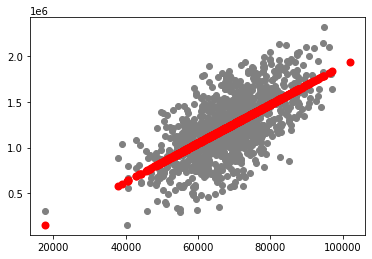

In [220]:
plt.scatter(X_test, y_test, color = 'gray')
plt.scatter(X_test, y_pred, color = 'red', linewidth=2)
plt.show()
# todo comments

In [222]:
print("r**2 test with increased number of test sets: ")

r**2 test with increased number of test sets: 


### Question 3: Now, can you include a few more numerical variable to improve your model? Does your R-square improve?

In [224]:
dx = df['Income'].values
dy = df['Price'].values

dx = dx.reshape(-1, 1)
dy = dy.reshape(-1, 1)

dx_train, dx_test, dy_train, dy_test = train_test_split(dx, dy, test_size=.5, random_state = 0)

model1 = LinearRegression()

model1.fit(dx_train, dy_train)

dy_pred = model1.predict(dx_test)

print("R squared value:", metrics.r2_score(dy_test, dy_pred))
print("RMSE value:", metrics.mean_squared_error(dy_test, dy_pred, squared = False))

R squared value: 0.41241758376367277
RMSE value: 273969.1829142043


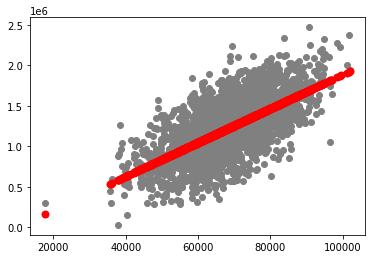

In [225]:
plt.scatter(dx_test, dy_test, color = 'gray')
plt.scatter(dx_test, dy_pred, color = 'red', linewidth = 2)

In [161]:
# Type your answer and code here
print("The r**2 value does not improve and the proof is above")

The r**2 value does not improve and the proof is above


### Question 4: Now do a 10-fold Cross Validation of your best model. Does your model pass cross validation?

In [ ]:
Type your code and answer here

### Now load the Professor Salary dataset


In [4]:
df = pd.read_csv("Salaries1.csv")
df.shape

(401, 6)

### Let's fix the Null and remove the outliers

In [5]:
df = df.dropna()
df = df[df.Salary < 500000]
df = df[df.YrsOfService < 80]
print(df.shape)
df.isnull().any()

(397, 6)


Rank            False
Discipline      False
YrsSincePhd     False
YrsOfService    False
Sex             False
Salary          False
dtype: bool

### Question 5: Build a one factor Linear regression model to predict the salary using the factor that has the highest correlation with the salary. Does your model pass cross validaton?

Type your code here

### Good Job.

### Part B:  Let's build a Logistic Regression model using the affairs data from
https://www.statsmodels.org/dev/datasets/generated/fair.html

The goal of the HW is to see if one can predict
whether a woman on given certain attributeds, suchas age, years married, number of children etc, will particpate
in an affair or not


#### DataSet Description

From the [Statsmodels website](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) we have the following information about the data:

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

In [234]:
# The dataset can be imported via the statsmodels like the following, but we are going to read from a csv file
# provided by the professor
# import statsmodels.api as sm
# orig_df = sm.datasets.fair.load_pandas().data

dff = pd.read_csv("affairs2.csv")
dff.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666


Now, create a new column called 'had_affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [235]:
# has_affair
def has_affair(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
dff['had_affair'] = dff['affairs'].apply(has_affair)

In [236]:
dff.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666,1


In [237]:
dff.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
6466,5.0,32.0,13.0,2.0,3.0,17.0,occ4,3.0,0.0,0
6467,4.0,32.0,13.0,1.0,1.0,16.0,occ5,5.0,0.0,0
6468,5.0,22.0,2.5,0.0,2.0,14.0,occ3,1.0,0.0,0
6469,5.0,32.0,6.0,1.0,3.0,14.0,occ3,4.0,0.0,0
6470,4.0,22.0,2.5,0.0,2.0,16.0,occ2,4.0,0.0,0


#### Let's do some exploratory data analysis. First check and remove missing values

### Question 6: Use a seaborn heatmap similar to what has shown in class to show if there are any missing values. Simply drop the rows that have missing values

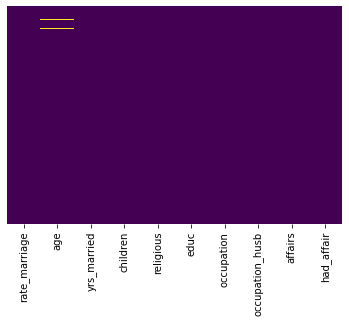

In [241]:
sns.heatmap(dff.isnull(), yticklabels=False, cbar=False, cmap='viridis')
dff.dropna(inplace = True)

In [243]:
df.isnull().all()

rate_marriage      False
age                False
yrs_married        False
children           False
religious          False
educ               False
occupation         False
occupation_husb    False
affairs            False
had_affair         False
dtype: bool

Here we do not have any null values

### Now, let's group by has or no affairs rows

In [73]:
df.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation_husb,affairs
had_affair,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.884559,2.187243


So, one can see older woman who has married longer will have higher chance of having an affairs

We can also use Factorplot to see the effect from age

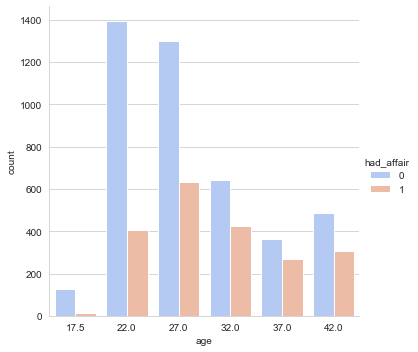

In [74]:
# Use Factorplot for age
sns.factorplot('age', kind='count', hue='had_affair', data=df,palette='coolwarm')

By looking at the ratio between the has_affair=1 versus has_affair=0, one can see that the older the woman, the higher the probability of having an affair

We can do the same thing for other variables such as years of marriage, number of children etc

### Question 7: Call factorplot for years of marriage, and number of children. Comment on whether you think they are important factors

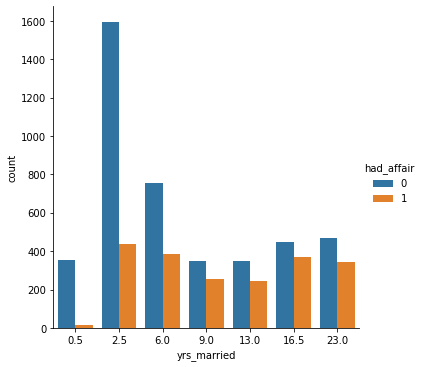

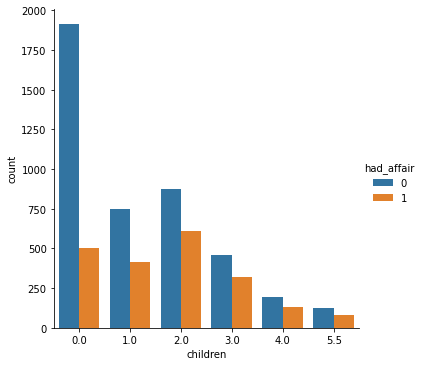

In [266]:
sns.factorplot(x ='yrs_married', kind ='count', hue = 'had_affair', data = dff)
sns.factorplot(x ='children', kind = 'count', hue = 'had_affair', data = dff)
plt.show()

Women who have been married for a smaller number of years are less likely to have na affair compared to women who have been married for a long time.

The second graph shows that people who do not have many children are less likely to have an affair.

### Question 8: build a logistic regression model with only Age, Number of years married, number of children, education to forecast had_affair. Remember to do the Train Test Split first and show the model performance results

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [295]:
df2 = dff[['age', 'yrs_married', 'children', 'educ']]
df2.head()

tx_train, tx_test, ty_train, ty_test = train_test_split(df2, dff['had_affair'], test_size = 0.2, random_state = 0)

model = LogisticRegression()
model.fit(tx_train, ty_train)

t_pred = model.predict(tx_test)

print('accuracy:', accuracy_score(ty_test, t_pred))
print()
print(classification_report(ty_test, t_pred))

accuracy: 0.6781789638932496

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       885
           1       0.42      0.13      0.20       389

    accuracy                           0.68      1274
   macro avg       0.56      0.53      0.50      1274
weighted avg       0.62      0.68      0.62      1274



In [77]:
# Hint:
# create a df2 from df with all the age, years of married, ... columns

### Question 9: Now, call a countplot to show the dependence of the affair on occupation and create dummies variable for the occupation categorical variable. Repeat for the religious variable. Then finally include both of these categorical variables to build a better model

<AxesSubplot:xlabel='had_affair', ylabel='count'>

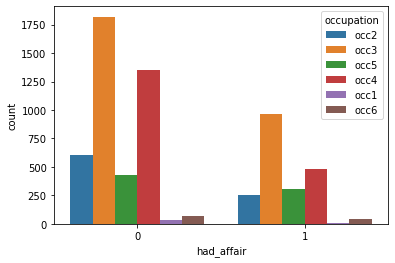

In [290]:
sns.countplot(x = 'had_affair', hue = 'occupation', data = dff)

In [297]:
occupation = pd.get_dummies(dff['occupation'])

In [298]:
# Hint create a df3 which is combining df2 with this new set of dummy variables using pd.concat method
df3 = pd.concat([tf, occupation], axis = 1)
df3.head()

,age,yrs_married,children,educ,occ1,occ2,occ3,occ4,occ5,occ6
0,32.0,9.0,3.0,17.0,0,1,0,0,0,0
1,27.0,13.0,3.0,14.0,0,0,1,0,0,0
2,22.0,2.5,0.0,16.0,0,0,1,0,0,0
3,37.0,16.5,4.0,16.0,0,0,0,0,1,0
4,27.0,9.0,1.0,14.0,0,0,1,0,0,0


In [303]:
ox_train, ox_test, oy_train, oy_test = train_test_split(df3, dff['had_affair'], test_size = 0.2, random_state = 0)

model = LogisticRegression()
model.fit(ox_train, oy_train)

o_pred = model.predict(ox_test)

print("R squared value:", metrics.r2_score(oy_test, o_pred))
print("RMSE value:", metrics.mean_squared_error(oy_test, o_pred, squared = False))

R squared value: -0.4987582240425257
RMSE value: 0.5638230124116617


## Question 10: Comment on your model results.

Type your answer